In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import and_
from sqlalchemy import or_

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x235978ac278>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [13]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x235978acf28>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [14]:
#PRECIPITATION 
result = session.query(Measurement.date, Measurement.prcp).\
filter(and_(Measurement.date < '2017-08-24', Measurement.date > '2016-08-22')).all()
for row in result:
    print(row) 

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

In [15]:
# Calculate the date 1 year ago from the last data point in the database

results = session.query(Measurement.date, Measurement.prcp, Measurement.id, Measurement.tobs, Measurement.station).filter(and_(Measurement.date < '2017-08-24', Measurement.date > '2016-08-22')).all()
for row in results:
    print(row)

('2016-08-23', 0.0, 2364, 81.0, 'USC00519397')
('2016-08-24', 0.08, 2365, 79.0, 'USC00519397')
('2016-08-25', 0.08, 2366, 80.0, 'USC00519397')
('2016-08-26', 0.0, 2367, 79.0, 'USC00519397')
('2016-08-27', 0.0, 2368, 77.0, 'USC00519397')
('2016-08-28', 0.01, 2369, 78.0, 'USC00519397')
('2016-08-29', 0.0, 2370, 78.0, 'USC00519397')
('2016-08-30', 0.0, 2371, 79.0, 'USC00519397')
('2016-08-31', 0.13, 2372, 80.0, 'USC00519397')
('2016-09-01', 0.0, 2373, 81.0, 'USC00519397')
('2016-09-02', 0.0, 2374, 80.0, 'USC00519397')
('2016-09-03', 0.0, 2375, 79.0, 'USC00519397')
('2016-09-04', 0.03, 2376, 75.0, 'USC00519397')
('2016-09-05', None, 2377, 79.0, 'USC00519397')
('2016-09-06', None, 2378, 76.0, 'USC00519397')
('2016-09-07', 0.05, 2379, 76.0, 'USC00519397')
('2016-09-08', 0.0, 2380, 80.0, 'USC00519397')
('2016-09-09', 0.03, 2381, 79.0, 'USC00519397')
('2016-09-10', 0.0, 2382, 78.0, 'USC00519397')
('2016-09-11', 0.05, 2383, 76.0, 'USC00519397')
('2016-09-12', 0.0, 2384, 78.0, 'USC00519397')
('2

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
result = session.query(Measurement.date, Measurement.prcp).\
filter(and_(Measurement.date < '2017-08-24', Measurement.date > '2016-08-22')).\
group_by(Measurement.date).order_by(Measurement.date).all()
for row in results:
    print(row)
#date, variable

('2016-08-23', 0.0, 2364, 81.0, 'USC00519397')
('2016-08-24', 0.08, 2365, 79.0, 'USC00519397')
('2016-08-25', 0.08, 2366, 80.0, 'USC00519397')
('2016-08-26', 0.0, 2367, 79.0, 'USC00519397')
('2016-08-27', 0.0, 2368, 77.0, 'USC00519397')
('2016-08-28', 0.01, 2369, 78.0, 'USC00519397')
('2016-08-29', 0.0, 2370, 78.0, 'USC00519397')
('2016-08-30', 0.0, 2371, 79.0, 'USC00519397')
('2016-08-31', 0.13, 2372, 80.0, 'USC00519397')
('2016-09-01', 0.0, 2373, 81.0, 'USC00519397')
('2016-09-02', 0.0, 2374, 80.0, 'USC00519397')
('2016-09-03', 0.0, 2375, 79.0, 'USC00519397')
('2016-09-04', 0.03, 2376, 75.0, 'USC00519397')
('2016-09-05', None, 2377, 79.0, 'USC00519397')
('2016-09-06', None, 2378, 76.0, 'USC00519397')
('2016-09-07', 0.05, 2379, 76.0, 'USC00519397')
('2016-09-08', 0.0, 2380, 80.0, 'USC00519397')
('2016-09-09', 0.03, 2381, 79.0, 'USC00519397')
('2016-09-10', 0.0, 2382, 78.0, 'USC00519397')
('2016-09-11', 0.05, 2383, 76.0, 'USC00519397')
('2016-09-12', 0.0, 2384, 78.0, 'USC00519397')
('2

In [17]:
Measurement_data_df=pd.DataFrame(results)
Measurement_data_df.head()

,date,prcp,id,tobs,station
0,2016-08-23,0.00,2364,81.0,USC00519397
1,2016-08-24,0.08,2365,79.0,USC00519397
2,2016-08-25,0.08,2366,80.0,USC00519397
3,2016-08-26,0.00,2367,79.0,USC00519397
4,2016-08-27,0.00,2368,77.0,USC00519397


In [18]:
# set the index to the date column
Meas_data_df=Measurement_data_df.set_index("date",drop=True)
# Sort the dataframe by date
sorted_Meas_data_df=Meas_data_df.sort_values("date",ascending=False)
sorted_Meas_data_df.head()
#df['Date'] =pd.to_datetime(df.Date)
#df.sort_values(by=['Date'])

,prcp,id,tobs,station
date,,,,
2017-08-23,0.45,19550,76.0,USC00516128
2017-08-23,0.08,12187,82.0,USC00519523
2017-08-23,0.00,7635,82.0,USC00514830
2017-08-23,0.00,2724,81.0,USC00519397
2017-08-22,0.00,12186,82.0,USC00519523


<function matplotlib.pyplot.show(*args, **kw)>

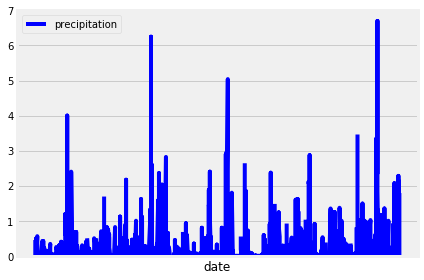

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
#get values for y axis 
precipitation_data_y=sorted_Meas_data_df["prcp"]

plt.xlabel("date")

#define y limit
plt.ylim(0.0,7.0)

plt.xticks([])

plt.plot(precipitation_data_y,c="blue", label="precipitation")
legend=plt.legend(fontsize="medium", loc="upper left")
plt.tight_layout()
plt.grid(True)
plt.savefig("precipitation.png")
plt.show

In [20]:
Measurement_data_df=pd.DataFrame(result)
Measurement_data_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [21]:
# set the index to the date column
#Meas_data_df=Measurement_data_df.set_index("date",drop=True)
# Sort the dataframe by date
sorted_Meas_data_df=Meas_data_df.sort_values("date",ascending=False)
sorted_Meas_data_df.head()
#df['Date'] =pd.to_datetime(df.Date)
#df.sort_values(by=['Date'])

,prcp,id,tobs,station
date,,,,
2017-08-23,0.45,19550,76.0,USC00516128
2017-08-23,0.08,12187,82.0,USC00519523
2017-08-23,0.00,7635,82.0,USC00514830
2017-08-23,0.00,2724,81.0,USC00519397
2017-08-22,0.00,12186,82.0,USC00519523


In [22]:
# Perform a query to retrieve the date and precipitation scores
df = pd.DataFrame(result)
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [23]:
# Perform a query to retrieve the date and precipitation scores indexed with date
prcp_df = df.set_index('date',drop=True)
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [24]:
#Describing precipitation
sorted_Meas_data_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [25]:
#Total number of stations
station_count = sorted_Meas_data_df['station'].count()
station_count

2230

In [37]:
# Creat a stations list

Station_results = session.query(Station.station, Station.name, Station.id, Station.latitude, Station.longitude, Station.elevation).statement
# for row in Station_results:
#      print(row)

In [30]:
df2 = pd.read_sql_query(Station_results, session.bind)
df2

,station,name,id,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",1,21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",2,21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",3,21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",4,21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",5,21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",6,21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",7,21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",8,21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",9,21.33310,-157.80250,152.4


In [33]:
#combining both tables
combined_df = pd.merge(df2,sorted_Meas_data_df, on="station")
combined_df.head

<bound method NDFrame.head of           station                          name  id_x  latitude  longitude  \
0     USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
1     USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
2     USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
3     USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
4     USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
5     USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
6     USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
7     USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
8     USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
9     USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
10    USC00519397          WAIKIKI 717.2, HI US     1   21.2716  -157.8168   
11    USC00519397          WAIKIKI

In [34]:
#list the stations and the counts in descending order
print(combined_df['name'].value_counts())

WAIKIKI 717.2, HI US                      361
WAIHEE 837.5, HI US                       352
MANOA LYON ARBO 785.2, HI US              349
KANEOHE 838.1, HI US                      343
WAIMANALO EXPERIMENTAL FARM, HI US        337
KUALOA RANCH HEADQUARTERS 886.9, HI US    305
PEARL CITY, HI US                         183
Name: name, dtype: int64


In [40]:
#using the station id from the query, calculate the lowest temp recorded
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs)).\
filter(Measurement.station == "USC00519397").all()


[(56.0, 87.0)]

In [41]:
#Query the last 12 months
session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519397").all()

[(65.0),
 (63.0),
 (74.0),
 (76.0),
 (73.0),
 (70.0),
 (64.0),
 (68.0),
 (73.0),
 (64.0),
 (61.0),
 (66.0),
 (65.0),
 (68.0),
 (64.0),
 (72.0),
 (66.0),
 (66.0),
 (69.0),
 (67.0),
 (67.0),
 (71.0),
 (67.0),
 (76.0),
 (68.0),
 (72.0),
 (70.0),
 (67.0),
 (66.0),
 (67.0),
 (69.0),
 (67.0),
 (67.0),
 (64.0),
 (69.0),
 (73.0),
 (73.0),
 (69.0),
 (69.0),
 (69.0),
 (71.0),
 (61.0),
 (69.0),
 (63.0),
 (64.0),
 (65.0),
 (67.0),
 (68.0),
 (65.0),
 (76.0),
 (75.0),
 (66.0),
 (70.0),
 (72.0),
 (73.0),
 (70.0),
 (71.0),
 (72.0),
 (72.0),
 (69.0),
 (70.0),
 (73.0),
 (72.0),
 (73.0),
 (70.0),
 (71.0),
 (68.0),
 (70.0),
 (72.0),
 (69.0),
 (68.0),
 (74.0),
 (72.0),
 (72.0),
 (73.0),
 (74.0),
 (73.0),
 (73.0),
 (74.0),
 (74.0),
 (74.0),
 (71.0),
 (72.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (73.0),
 (73.0),
 (71.0),
 (71.0),
 (68.0),
 (70.0),
 (71.0),
 (74.0),
 (71.0),
 (75.0),
 (76.0),
 (75.0),
 (75.0),
 (76.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (73.0),
 (74.0),
 (76.0),
 (76.0),
 (80.0),
 (74.0),
 

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
